In [84]:
import numpy as np
import pandas as pd 

red_df = pd.read_csv('winequality-red.csv', sep=';')
white_df = pd.read_csv('winequality-white.csv', sep=';')

# Add a new column to distinguish between red and white wines
red_df['type']  =  'Red'
white_df['type'] = 'White'

# # Combine the datasets 
all_df = pd.concat([red_df, white_df], ignore_index=True)   
all_df  

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,Red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,Red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,Red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,Red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,Red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,White
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,White
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,White
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,White


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


C:\Users\skyli\AppData\Local\Temp\ipykernel_18444\2653621205.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='type', data=all_df, palette='Set2')


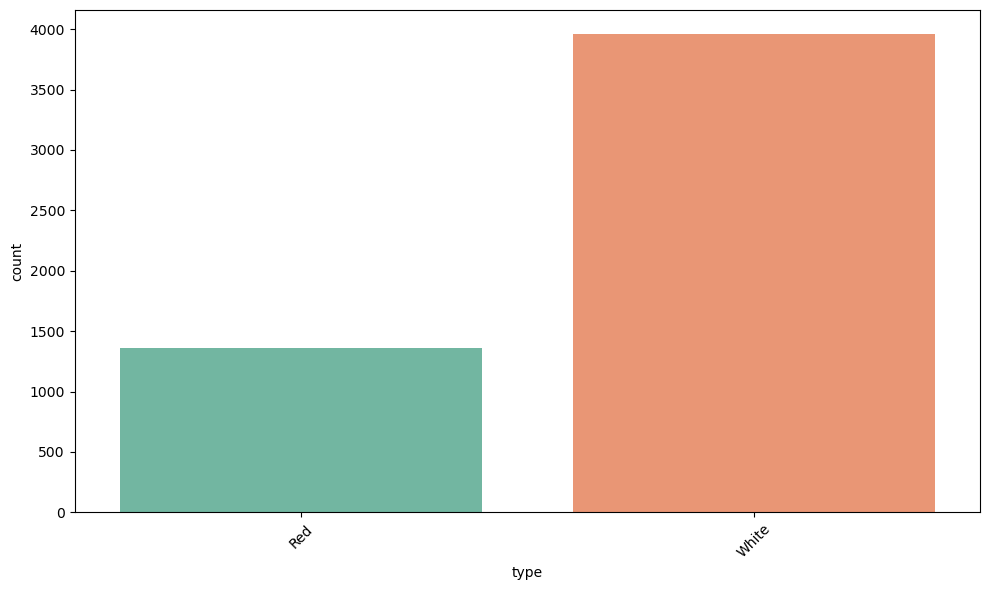

C:\Users\skyli\AppData\Local\Temp\ipykernel_18444\2653621205.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='type', y='quality', data=all_df, palette='Set2')


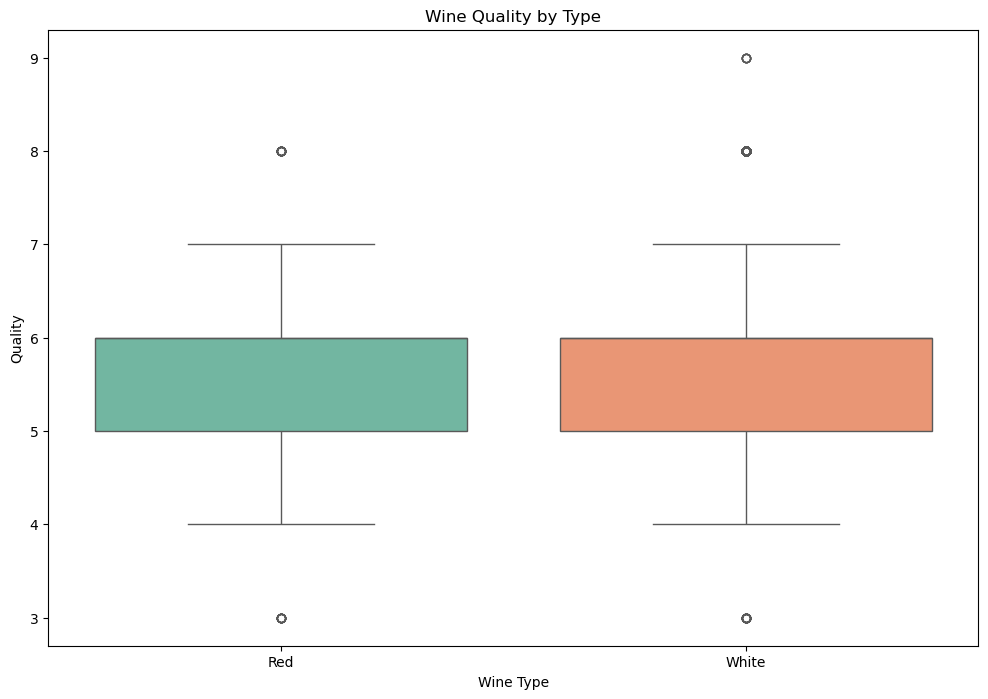

In [85]:
# 'Data Cleaning '
all_df.info()  
# Check for missing values, duplicates, and basic statistics
all_df.isnull().sum()  
all_df.describe()
all_df.duplicated().sum() 
all_df.drop_duplicates(inplace=True) 
all_df.reset_index(drop=True, inplace=True)  # Reset index after dropping duplicates
all_df.duplicated().sum() 

# #Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt     
plt.figure(figsize=(10, 6))
sns.countplot(x='type', data=all_df, palette='Set2')    
# Display the count of each wine type
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability      
plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels
plt.show()

plt.figure(figsize=(12, 8)) 
sns.boxplot(x='type', y='quality', data=all_df, palette='Set2')
plt.title('Wine Quality by Type')   
plt.xlabel('Wine Type')
plt.ylabel('Quality')   
plt.show()  

In [86]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#remove outliers
def remove_outliers_iqr(df, features):
    for col in features:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df
# Apply IQR removal on all numeric features
features_to_check = all_df.select_dtypes(include='number').columns.drop(['quality'])  # exclude target if needed
all_df_cleaned = remove_outliers_iqr(all_df.copy(), features_to_check)

print("Original shape:", all_df.shape)
print("After outlier removal:", all_df_cleaned.shape)

Original shape: (5320, 13)
After outlier removal: (3812, 13)


In [87]:
def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower) & (df[col] <= upper)]
    return df

numeric_cols = all_df.select_dtypes(include=np.number).columns
all_df_clean = remove_outliers_iqr(all_df, numeric_cols)
print("After outlier removal:", all_df_clean.shape)
all_df_cleaned



After outlier removal: (3671, 13)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
5,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.99640,3.30,0.46,9.4,5,Red
8,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5,Red
18,8.9,0.22,0.48,1.8,0.077,29.0,60.0,0.99680,3.39,0.53,9.4,6,Red
19,7.6,0.39,0.31,2.3,0.082,23.0,71.0,0.99820,3.52,0.65,9.7,5,Red
23,6.3,0.39,0.16,1.4,0.080,11.0,23.0,0.99550,3.34,0.56,9.3,5,Red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5315,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,White
5316,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,White
5317,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,White
5318,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,White


In [88]:
#encode wine type 
from sklearn.preprocessing import LabelEncoder
all_wines_clean = all_df_clean.copy()  # Use the cleaned DataFrame
le_type = LabelEncoder()    
all_wines_clean["type"] = le_type.fit_transform(all_wines_clean["type"])  # Red=1, White=0
all_wines_clean


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
5,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.99640,3.30,0.46,9.4,5,0
8,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5,0
18,8.9,0.22,0.48,1.8,0.077,29.0,60.0,0.99680,3.39,0.53,9.4,6,0
19,7.6,0.39,0.31,2.3,0.082,23.0,71.0,0.99820,3.52,0.65,9.7,5,0
23,6.3,0.39,0.16,1.4,0.080,11.0,23.0,0.99550,3.34,0.56,9.3,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5315,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,1
5316,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,1
5317,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,1
5318,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,1


In [89]:
#scale the data
# from sklearn.preprocessing import StandardScaler    
# scaler = StandardScaler()
# numeric_cols = all_wines_clean.select_dtypes(include=np.number).columns.drop(['type'])       # Exclude 'quality' if it's the target variable
# all_wines_clean[numeric_cols] = scaler.fit_transform(all_wines_clean[numeric_cols]) 
# all_wines_clean.head()  # Display the first few rows of the scaled DataFrame        
# Encode wine type for future use

In [93]:
#feature and target separation
X = all_wines_clean.drop(columns=['type'])  
y = all_wines_clean['type']  # Assuming 'type' is the target variable 

# split the data into training and testing sets

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#validate the split
print("Training set shape:", X_train.shape, y_train.shape)  
print("Testing set shape:", X_test.shape, y_test.shape)     

#train and test the model
from sklearn.ensemble import RandomForestClassifier 
model = RandomForestClassifier(n_estimators=100, random_state=42)  # Initialize the model with 100 trees
# Fit the model to the training data
model.fit(X_train, y_train)









# #choose a model 
# from sklearn.ensemble import RandomForestClassifier
# model = RandomForestClassifier(n_estimators=100, random_state=42)  # Initialize the model with 100 trees
# # Fit the model to the training data 
# model.fit(X_train, y_train) 

# # Choose and train a machine learning model
# from sklearn.linear_model import LogisticRegression
# model_red = LogisticRegression()        
# model_red.fit(X_train_red, y_train_red)  # Train the model with training data   


#choose a model
# from sklearn.linear_model import LogisticRegression 
# model = LogisticRegression( random_state=42)  # Initialize the model with a higher max_iter
# model.fit(X_train, y_train)  # Fit the model to the training data   
# Evaluate the model's performance on the test set



# #make predictions
# y_pred = model.predict(X_test)  # Predict on the test set   
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# # Evaluate the model's performance  
# accuracy = accuracy_score(y_test, y_pred)
# print(f"Accuracy: {accuracy:.2f}")  # Print the accuracy of the model   
# print("Classification Report:\n", classification_report(y_test, y_pred))  # Print classification report
# print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))  # Print confusion matrix
# # Save the model for future use

# import joblib   
# joblib.dump(model, 'wine_quality_model.pkl')  # Save the trained model to a file    
# # Load the model for future predictions
# loaded_model = joblib.load('wine_quality_model.pkl')  # Load the model from the file
# # Make predictions with the loaded model 
# new_predictions = loaded_model.predict(X_test)  # Predict on the test set
# print("New Predictions:", new_predictions)  # Print the predictions made by the loaded model






Training set shape: (2936, 12) (2936,)
Testing set shape: (735, 12) (735,)


RandomForestClassifier(random_state=42)

In [104]:
#train and test another model
from sklearn.linear_model import LogisticRegression     
#hyperparameters    
model = LogisticRegression(random_state=42, max_iter=200)  # Initialize the model with a higher max_iter
model.fit(X_train, y_train)  # Fit the model to the training data   


# model = LogisticRegression(random_state=42)  # Initialize the model with a higher max_iter
# model.fit(X_train, y_train)  # Fit the model to the training data       


c:\Users\skyli\anaconda3\envs\SilverFoxes\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=200, random_state=42)

In [ ]:
# #select another machine learning model
# from sklearn import svm
# model = svm.SVC(kernel='linear', random_state=42)  # Initialize the SVM model with a linear kernel
# model.fit(X_train, y_train)  # Fit the model to the training data       


SVC(kernel='linear', random_state=42)

In [105]:
#make predictions   
y_pred = model.predict(X_test)  # Predict on the test set
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix 
# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)   
print(f"Accuracy: {accuracy:.2f}")  # Print the accuracy of the model
print("Classification Report:\n", classification_report(y_test, y_pred))  # Print classification report
# print("Confusion Matrix:", confusion_matrix(y_test, y_pred))  # Print confusion matrix
print("Confusion Matrix:")  # Print confusion matrix
print(confusion_matrix(y_test, y_pred))  # Print confusion matrix
# Save the model for future use

Accuracy: 0.97
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.81      0.88        96
           1       0.97      1.00      0.98       639

    accuracy                           0.97       735
   macro avg       0.97      0.90      0.93       735
weighted avg       0.97      0.97      0.97       735

Confusion Matrix:
[[ 78  18]
 [  3 636]]


In [103]:
# Make predictions
y_pred = model.predict(X_test)  # Predict on the test set   
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Evaluate the model's performance  
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")  # Print the accuracy of the model   
print("Classification Report:\n", classification_report(y_test, y_pred))  # Print classification report
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))  # Print confusion matrix

#F1 score

from sklearn.metrics import f1_score    
f1 = f1_score(y_test, y_pred, average='weighted')  # Calculate F1 score with weighted average
print(f"F1 Score: {f1:.2f}")  # Print the F1 score  



Accuracy: 0.98
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.89      0.93        96
           1       0.98      1.00      0.99       639

    accuracy                           0.98       735
   macro avg       0.99      0.94      0.96       735
weighted avg       0.98      0.98      0.98       735

Confusion Matrix:
 [[ 85  11]
 [  1 638]]
F1 Score: 0.98
